In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

### Load and Compare Message Counts Per Channel

Message counts per channel:
                          Raw Count  Cleaned Count
Channel Username                                 
@Leyueqa                      1000            552
@ethio_brand_collection       1000            999
@marakibrand                  1000            263
@modernshoppingcenter         1000            293
@qnashcom                     1000            850
@sinayelj                     1000            252


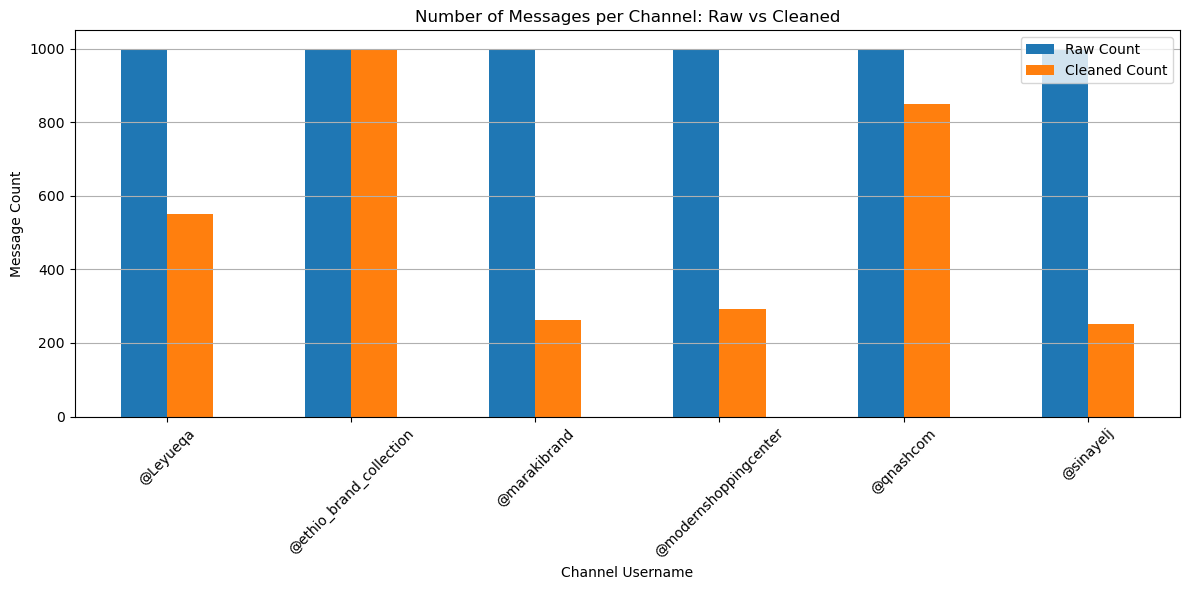

In [3]:
# Load raw and cleaned datasets
raw_df = pd.read_csv('../data/raw/telegram_data.csv')
clean_df = pd.read_csv('../data/processed/clean_telegram_data.csv')

# Count messages per channel
raw_counts = raw_df['Channel Username'].value_counts().sort_index()
clean_counts = clean_df['Channel Username'].value_counts().sort_index()

# Combine into a single DataFrame
counts_df = pd.DataFrame({
    'Raw Count': raw_counts,
    'Cleaned Count': clean_counts
}).fillna(0).astype(int)

print("Message counts per channel:\n", counts_df)

# Plot side-by-side bars
counts_df.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Messages per Channel: Raw vs Cleaned')
plt.xlabel('Channel Username')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [4]:
channel_list = [
    '@qnashcom',
    '@marakibrand',
    '@modernshoppingcenter',
    '@sinayelj',
    '@Leyueqa',
    '@ethio_brand_collection'
]

for channel_name, group_df in raw_df.groupby('Channel Username'):
    if channel_name in channel_list:
        print(f"\nChannel: {channel_name}")
        print(group_df.head())  # Show first 5 rows of each channel




Channel: @Leyueqa
     Channel Title Channel Username    ID  \
4000         ልዩ እቃ         @Leyueqa  7593   
4001         ልዩ እቃ         @Leyueqa  7592   
4002         ልዩ እቃ         @Leyueqa  7591   
4003         ልዩ እቃ         @Leyueqa  7590   
4004         ልዩ እቃ         @Leyueqa  7589   

                                                Message  \
4000  💙💙💙💙💙💙💙 Kitchen Oil proof Stickers ለኪችንዎ ግርማሞገ...   
4001  ✨✨SOKANY 4 IN 1 HAND BLENDER ⚡️300Watt ጉልበት ያለ...   
4002  🔠🔠🔠🔠🔠💡🔠🔠🔠🔠70ሴ.ሜ ድረስ የጎን ሳይዝ ያላቸዉ ለማንኛዉም ፍሪጅ+ለኦ...   
4003                                                NaN   
4004                                                NaN   

                           Date                        Media Path  
4000  2025-06-18 11:03:35+00:00                               NaN  
4001  2025-06-18 08:38:20+00:00  data/raw\photos\Leyueqa_7592.jpg  
4002  2025-06-18 06:01:15+00:00                               NaN  
4003  2025-06-17 14:27:10+00:00  data/raw\photos\Leyueqa_7590.jpg  
4004  2025-06-1

In [5]:
channel_list = [
    '@qnashcom',
    '@marakibrand',
    '@modernshoppingcenter',
    '@sinayelj',
    '@Leyueqa',
    '@ethio_brand_collection'
]

for channel_name, group_df in clean_df.groupby('Channel Username'):
    if channel_name in channel_list:
        print(f"\nChannel: {channel_name}")
        print(group_df.head())  # Show first 5 rows of each channel



Channel: @Leyueqa
     Channel Title Channel Username    ID  \
1658         ልዩ እቃ         @Leyueqa  7593   
1659         ልዩ እቃ         @Leyueqa  7592   
1660         ልዩ እቃ         @Leyueqa  7591   
1661         ልዩ እቃ         @Leyueqa  7588   
1662         ልዩ እቃ         @Leyueqa  7587   

                                                Message  \
1658  💙💙💙💙💙💙💙 Kitchen Oil proof Stickers ለኪችንዎ ግርማሞገ...   
1659  ✨✨SOKANY 4 IN 1 HAND BLENDER ⚡️300Watt ጉልበት ያለ...   
1660  🔠🔠🔠🔠🔠💡🔠🔠🔠🔠70ሴ.ሜ ድረስ የጎን ሳይዝ ያላቸዉ ለማንኛዉም ፍሪጅ+ለኦ...   
1661  💥💥storage bowl 4pcs ዋጋ 2100 ከነፃ ዲሊቨሪ ጋር በተጨማሪ ...   
1662  🆕🔄የቡና ስኒዎች ከማስቀመጫ ጋር 💵 ዋጋ 6ፍሬ 2000 ከነፃ ዲሊቨሪ ጋር...   

                           Date                        Media Path  
1658  2025-06-18 11:03:35+00:00                               NaN  
1659  2025-06-18 08:38:20+00:00  data/raw\photos\Leyueqa_7592.jpg  
1660  2025-06-18 06:01:15+00:00                               NaN  
1661  2025-06-17 14:27:10+00:00  data/raw\photos\Leyueqa_7588.jpg  
1662  2025-06-1

In [16]:
Amharic_clean_df = pd.read_csv('../data/processed/final_amharic_preprocessed.csv')
channel_list = [
    '@qnashcom',
    '@marakibrand',
    '@modernshoppingcenter',
    '@sinayelj',
    '@Leyueqa',
    '@ethio_brand_collection'
]

for channel_name, group_df in Amharic_clean_df.groupby('Channel Username'):
    if channel_name in channel_list:
        print(f"\nChannel: {channel_name}")
        print(group_df.head())  # Show first 5 rows of each channel


Channel: @Leyueqa
     Channel Title Channel Username    ID  \
1658         ልዩ እቃ         @Leyueqa  7593   
1659         ልዩ እቃ         @Leyueqa  7592   
1660         ልዩ እቃ         @Leyueqa  7591   
1661         ልዩ እቃ         @Leyueqa  7588   
1662         ልዩ እቃ         @Leyueqa  7587   

                                                Message  \
1658  💙💙💙💙💙💙💙 Kitchen Oil proof Stickers ለኪችንዎ ግርማሞገ...   
1659  ✨✨SOKANY 4 IN 1 HAND BLENDER ⚡️300Watt ጉልበት ያለ...   
1660  🔠🔠🔠🔠🔠💡🔠🔠🔠🔠70ሴ.ሜ ድረስ የጎን ሳይዝ ያላቸዉ ለማንኛዉም ፍሪጅ+ለኦ...   
1661  💥💥storage bowl 4pcs ዋጋ 2100 ከነፃ ዲሊቨሪ ጋር በተጨማሪ ...   
1662  🆕🔄የቡና ስኒዎች ከማስቀመጫ ጋር 💵 ዋጋ 6ፍሬ 2000 ከነፃ ዲሊቨሪ ጋር...   

                           Date                        Media Path  \
1658  2025-06-18 11:03:35+00:00                               NaN   
1659  2025-06-18 08:38:20+00:00  data/raw\photos\Leyueqa_7592.jpg   
1660  2025-06-18 06:01:15+00:00                               NaN   
1661  2025-06-17 14:27:10+00:00  data/raw\photos\Leyueqa_7588.jpg   
1662  2025

In [17]:
Amharic_clean_df['Processed_Message']
#Amharic_clean_df['Message']

0       ቡና ማፍያ ማሽን ዋጋ ብር ውስን ፍሬ ነው የቀረው ጥራት ዋስትና ቅናሽ አ...
1       ዋጋ ብር ለማዘዝ ውስን ፍሬ ነው የቀረው ጥራት ዋስትና ቅናሽ አድራሻ ቁጥ...
2       ዋጋ ብር ለማዘዝ ውስን ፍሬ ነው የቀረው ጥራት ዋስትና ቅናሽ አድራሻ ቁጥ...
3       ዋጋ ብር ለማዘዝ ውስን ፍሬ ነው የቀረው ጥራት ዋስትና ቅናሽ አድራሻ ቁጥ...
4       ቢላ የስጋ የአጥንት ብር ለማዘዝ ውስን ፍሬ ነው የቀረው ጥራት ዋስትና ቅ...
                              ...                        
3204    አድራሻ ሜክሲኮ ኮሜርስ ጀርባ መዚድ ፕላዛ የመጀመሪያ ደረጃ እንደወጡ የቢ...
3205      አድራሻ ሜክሲኮ ኮሜርስ ጀርባ መዚድ ፕላዛ አንደኛ ደረጃ እንደወጡ ያገኙናል
3206      አድራሻ ሜክሲኮ ኮሜርስ ጀርባ መዚድ ፕላዛ አንደኛ ደረጃ እንደወጡ ያገኙናል
3207    አድራሻ ሜክሲኮ ኮሜርስ ጀርባ መዚድ ፕላዛ የመጀመሪያ ደረጃ እንደወጡ የቢ...
3208    አድራሻ ሜክሲኮ ኮሜርስ ጀርባ መዚድ ፕላዛ የመጀመሪያ ደረጃ እንደወጡ የቢ...
Name: Processed_Message, Length: 3209, dtype: object

### Image count per channel

                      Image Count
Leyueqa                       643
ethio                         999
marakibrand                   980
modernshoppingcenter          824
qnashcom                      583
sinayelj                      966


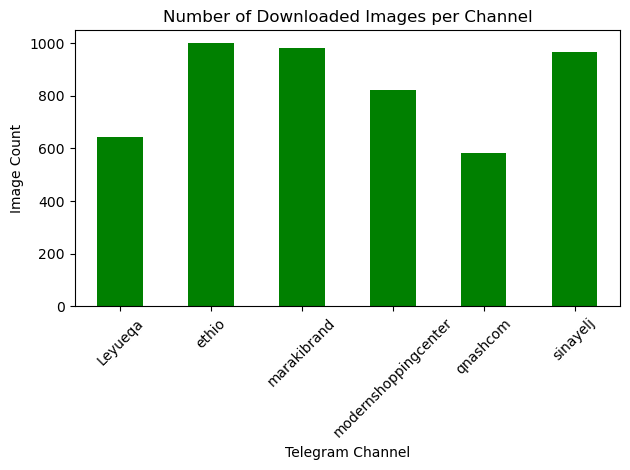

In [18]:
# Count number of images per channel from filenames
image_dir = "../data/raw/photos"
image_files = os.listdir(image_dir)

# Assumes filenames like: 'channelname_12345.jpg'
channel_names = [img.split('_')[0] for img in image_files if img.endswith('.jpg')]
image_counts = Counter(channel_names)

# Convert to DataFrame
img_df = pd.DataFrame.from_dict(image_counts, orient='index', columns=["Image Count"]).sort_index()

# Display image counts
print(img_df)

# Plot image counts
img_df.plot(kind='bar', legend=False, color='green')
plt.title("Number of Downloaded Images per Channel")
plt.xlabel("Telegram Channel")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()